<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Exercise 

**Task**

Your task is to perform PCA to speed up a classification algorithm on a high-dimensional dataset.

We will use the MNIST digits dataset, which comes pre-installed in sklearn. This dataset has 8x8 pixel images of handwritten digits 0-9. Your task is to classify these to determine which digits they are.

Use PCA to lower the dimensions in this dataset, then use a classification algorithm of your choice to classify the digits. 


Note that it is up to you to determine how many principal components to use for your model to account for 95% of the variance in the data.

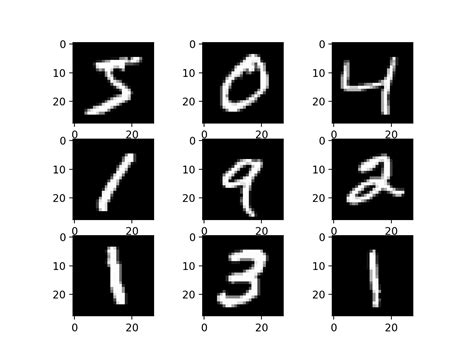

## Import Libraries and Load Data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [116]:
mnist = fetch_openml('mnist_784')
X = mnist.data
print('X Shape:', X.shape)

y = mnist.target
print('y Shape:', y.shape)

X Shape: (70000, 784)
y Shape: (70000,)


### PCA

**Scale data**

In [117]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

**Apply PCA**

In [127]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Visualize Scree Plot**

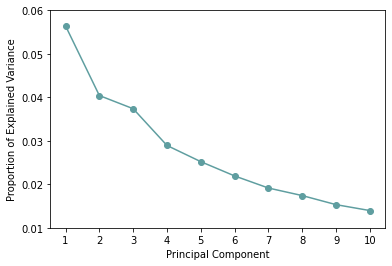

In [128]:
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker= 'o', color= 'cadetblue')
plt.xticks(ticks = range(1, 11))
plt.yticks(ticks= (0.01, 0.02, 0.03, 0.04, 0.05, 0.06))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

     Results: n_components = 4

**Split data into training & testing sets**

**Scale**

In [120]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Logistic Regression Model

In [136]:
# fit PCA
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [ ]:
# fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

**Evaluate model**

In [138]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.614647619047619
Testing accuracy: 0.6113142857142857


### Random Forest Model

In [143]:
# fit PCA
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [146]:
# fit random forest classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Evaluate model**

In [147]:
print('Training accuracy:', rfc.score(X_train_pca, y_train))
print('Testing accuracy:', rfc.score(X_test_pca, y_test))

Training accuracy: 1.0
Testing accuracy: 0.6816571428571429


10 Predictions: ['5' '5' '3' '6' '2' '3' '5' '1' '3' '6']
Accuracy Score: 0.9677142857142857
Out-of-bag Error: 0.9648190476190476
Estimator Range: [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.8128571428571428, 0.9450857142857143, 0.9601714285714286, 0.9621714285714286, 0.9634857142857143, 0.9653142857142857, 0.9668, 0.9670285714285715, 0.9676571428571429, 0.9678857142857142, 0.9687428571428571]
 


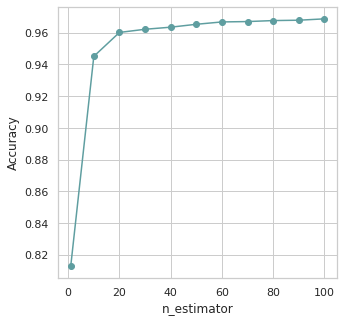

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
clf = RandomForestClassifier(n_estimators= 100,
                             bootstrap=True,
                             oob_score=True)
clf.fit(X_train, y_train)
clf.predict(X_test[0:10])
print('10 Predictions:', clf.predict(X_test[0:10]))

# The class imbalance is not that extreme for our dataset
# Since class labels are required in order to determine the degree of class imbalance,
# class imbalance is typically gauged with respect to the training distribution

score = clf.score(X_test, y_test)
print('Accuracy Score:', score)

# out-of-bag error
print('Out-of-bag Error:', clf.oob_score_)

# tuning n_estimators (num of decision trees)
# list of values to try for n_estimators:
estimator_range = [1] + list(range(10, 101, 10))
print('Estimator Range:', estimator_range)
# list to store the avg accuracies for each value of n_estimators:
scores = []
for estimator in estimator_range:
  clf = RandomForestClassifier(n_estimators=estimator,
                               random_state=1,
                               bootstrap=True)
  clf.fit(X_train, y_train)
  scores.append(clf.score(X_test, y_test))
print(scores)
print(' ')

fig, axes =plt.subplots(nrows=1, ncols=1, figsize= (5,5));

axes.plot(estimator_range, scores, color='cadetblue', marker='o');
axes.set_xlabel('n_estimator');
axes.set_ylabel('Accuracy');
axes.grid(True)
plt.show();

# Citations

1. https://towardsdatascience.com/classifying-mnist-digits-using-pca-deep-learning-852aeaff48a5